# 🧭 Covid Dashboard v4



In [1]:
# 📦 Widget imports (gegarandeerd bovenaan)
import ipywidgets as widgets

In [2]:
# 📦 Vereiste packages checken
import importlib
packages = ['geopandas', 'fiona', 'shapely', 'matplotlib', 'ipywidgets', 'seaborn']
for pkg in packages:
    try:
        importlib.import_module(pkg)
        print(f'✅ {pkg} geïnstalleerd')
    except ImportError:
        print(f'⚠️ {pkg} NIET geïnstalleerd')

✅ geopandas geïnstalleerd
✅ fiona geïnstalleerd
✅ shapely geïnstalleerd
✅ matplotlib geïnstalleerd
✅ ipywidgets geïnstalleerd
✅ seaborn geïnstalleerd


In [3]:
# 📂 Paden instellen + modules laden
import os, sys
from pathlib import Path

project_root = Path.cwd()
while not (project_root / 'config.py').exists() and project_root != project_root.parent:
    project_root = project_root.parent
sys.path.insert(0, project_root.as_posix())

from config import SRC_DIR, CSV_DIR
if SRC_DIR.as_posix() not in sys.path:
    sys.path.insert(0, SRC_DIR.as_posix())

print('Werkdirectory ingesteld op:', os.getcwd())

Werkdirectory ingesteld op: /Users/hvingen/repo/ou/covid_dashboard_v5/covid_dashboard/notebooks


In [4]:
# 📂 Lijst beschikbare kolommen in de schone COVID dataset
import data_service

df = data_service.get_prepared_covid_dataset()
print("Beschikbare kolommen in df:", df.columns.tolist())

Beschikbare kolommen in df: ['Total_reported', 'Deceased', 'Hospital_admission', 'Municipality_name_merged', 'Province_merged', 'Year', 'Month', 'Month_name']


In [5]:
# 🧾 Plot-titel dynamisch genereren
# if 'gdf' in locals():
#     perc = int(sampling_dropdown.value * 100)
#     filename = gpkg_selector.label if hasattr(gpkg_selector, 'label') else gpkg_selector.value.name
#     title = f'{filename} | Layer: {layer_selector.value} | Sampling: {perc}%'
#     print(title)
# else:
#     print('⚠️ Geen gegevens geladen voor plot-titel')

Werkdirectory ingesteld op: /Users/hvingen/repo/ou/covid_dashboard_v5/covid_dashboard/notebooks


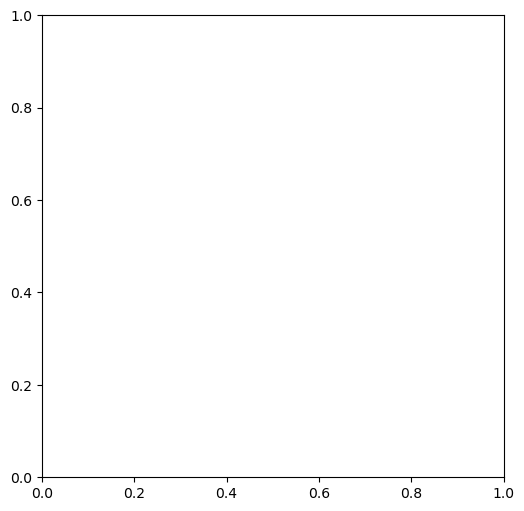

In [6]:
# 🎨 Layoutfixes en preview verbeteringen (v003h)
# 📂 Paden instellen + modules laden
import os, sys
from pathlib import Path


project_root = Path.cwd()
while not (project_root / 'config.py').exists() and project_root != project_root.parent:
    project_root = project_root.parent
sys.path.insert(0, project_root.as_posix())

from config import SRC_DIR, CSV_DIR
if SRC_DIR.as_posix() not in sys.path:
    sys.path.insert(0, SRC_DIR.as_posix())

print('Werkdirectory ingesteld op:', os.getcwd())

import data_service 
from data_service import get_metric_mapping, get_available_years
import covid_dashboard_presenter
from IPython.display import display
from ipywidgets import Button, Layout, Textarea, HBox, VBox

from data_service import get_province_heatmap_data
from data_service import get_municipality_heatmap_data
from data_service import get_province_heatmap_riool_data
from data_service import get_municipality_heatmap_riool_data

from covid_dashboard_presenter import plot_province_heatmap
from covid_dashboard_presenter import plot_municipality_heatmap
from covid_dashboard_presenter import plot_province_heatmap_riool
from covid_dashboard_presenter import plot_municipality_heatmap_riool

# Let Municipalities checkbox flip exclusive
def on_municipalities_change(change):
    if change['new'] == True:
        months_checkbox.value = False

# Let Months checkbox flip exclusive
def on_months_change(change):
    if change['new'] == True:
        municipalities_checkbox.value = False

# Plot Covid GUI
def update_plot(year, total_reported, hospital_admission, deceased, province, municipalities, months):
    covid_dashboard_presenter.update_plot(df,
                                        year, 
                                        total_reported, 
                                        hospital_admission, 
                                        deceased, 
                                        province, 
                                        municipalities, 
                                        months)  

def update_province_heatmap(year, column):
    gdf = get_province_heatmap_data(year)
    plot_province_heatmap(gdf, column=column)

# Functie om de heatmap bij te werken
def update_municipality_heatmap(year, metric):
    gdf = get_municipality_heatmap_data(year)
    plot_municipality_heatmap(gdf, metric=metric)

# Plot Rioolwater GUI
def update_plot_riool(year):
    covid_dashboard_presenter.update_plot_riool(year)  

# Create a list of outs for tabs
out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()

# Create a list of tabs for GUI
tab = widgets.Tab(children = [out1, out2, out3])
tab.set_title(0, 'Corona')
tab.set_title(1, 'Heatmap')
tab.set_title(2, 'Rioolwater')
# display(tab)

with out1:
    # Create dashboard widgets for UI controls
    title_widget1 = widgets.HTML("<h3 style='text-align:center;'>COVID-Dataset</h3>")

    year_dropdown = widgets.Dropdown(description='Year:', options=get_available_years(df))
    total_reported_checkbox = widgets.Checkbox(value=True, description='Total reported')
    hospital_admission_checkbox = widgets.Checkbox(value=True, description='Hospital admission')
    deceased_checkbox = widgets.Checkbox(value=True, description='Deceased')
    province_dropdown = widgets.Dropdown(description='Level:', options=['Netherlands', 'All provinces'] + df['Province_merged'].dropna().unique().tolist(), value='Netherlands')
    municipalities_checkbox = widgets.Checkbox(value=True, description='Municipalities')
    months_checkbox = widgets.Checkbox(value=False, description='Months')
    months_checkbox.observe(on_months_change, names='value')
    municipalities_checkbox.observe(on_municipalities_change, names='value')

    row1 = VBox( [year_dropdown, total_reported_checkbox, hospital_admission_checkbox, deceased_checkbox, province_dropdown, municipalities_checkbox, months_checkbox] )
    # row2 = HBox( [year_dropdown, total_reported_checkbox] )
    # ui = VBox( [row1, row2] )
    ui = VBox( [title_widget1, row1] )
    out = widgets.interactive_output(update_plot, {'year':year_dropdown, 'total_reported':total_reported_checkbox, 'hospital_admission':hospital_admission_checkbox, 'deceased':deceased_checkbox, 'province': province_dropdown, 'municipalities': municipalities_checkbox, 'months': months_checkbox} )
    display(ui, out)  
    
with out2:              
    title_widget2 = widgets.HTML("<h3 style='text-align:center;'>Heatmap Provinces</h3>")

    year_dropdown = widgets.Dropdown(
        description='Year:',
        options=get_available_years(df)
    )

    # Mapping: zichtbare naam -> kolomnaam in de dataset
    metric_options = get_metric_mapping()
    metric_dropdown = widgets.Dropdown(
        description='Metric:',
        options=list(metric_options.keys()),
        value='Total reported'
    )

    region_dropdown = widgets.Dropdown(
        description='Level:',
        options=['Provinces', 'Municipalities'],
        value='Provinces'
    )

    def update_heatmap(year, metric_label, region_type):
        title_text = 'Heatmap ' + region_type
        title_widget2.value = f"<h3 style='text-align:center;'>{title_text}</h3>"
        metric = metric_options[metric_label]
        if region_type == 'Provinces':
            gdf = get_province_heatmap_data(year)
            plot_province_heatmap(gdf, column=metric)
        else:
            gdf = get_municipality_heatmap_data(year)
            plot_municipality_heatmap(gdf, column=metric)

    ui = VBox([title_widget2, year_dropdown, metric_dropdown, region_dropdown])
    out = widgets.interactive_output(update_heatmap, {
        'year': year_dropdown,
        'metric_label': metric_dropdown,
        'region_type': region_dropdown
    })
    display(ui, out)


with out3:          
    # Create dashboard widgets for UI controls
    # year_dropdown = widgets.Dropdown(description='Year:', options=df_riool['Year'].dropna().sort_values().unique().tolist())
    title_widget3 = widgets.HTML("<h3 style='text-align:center;'>Heatmap Riool</h3>")

    year_dropdown = widgets.Dropdown(
        description='Year:',
        options=get_available_years(df)
    )

    region_dropdown = widgets.Dropdown(
        description='Level:',
        options=['Provinces', 'Municipalities'],
        value='Provinces'
    )

    def update_heatmap_riool(year, region_type):
        title_text = 'Heatmap ' + region_type
        title_widget2.value = f"<h3 style='text-align:center;'>{title_text}</h3>"
        if region_type == 'Provinces':
            gdf = get_province_heatmap_riool_data(year)
            plot_province_heatmap_riool(gdf)
        else:
            gdf = get_municipality_heatmap_riool_data(year)
            plot_municipality_heatmap_riool(gdf)

    ui = VBox([title_widget3, year_dropdown, region_dropdown])
    out = widgets.interactive_output(update_heatmap_riool, {
        'year': year_dropdown,
        'region_type': region_dropdown
    })
    display(ui, out)


display(tab)